<a href="https://colab.research.google.com/github/chaiminwoo0223/Computer-Vision/blob/main/Class5/program04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 깊은 다층 퍼셉트론으로 MNIST 인식하기

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

## 1.데이터 준비

In [2]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
# 1차원 구조로 변환
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# [0, 1]로 정규화
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
# 원핫 코드로 변환
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


## 2.모델 선택

In [3]:
dmlp = Sequential()
dmlp.add(Dense(units=1024, activation='relu', input_shape=(784,)))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=10, activation='softmax'))

## 3.학습 및 예측

In [4]:
dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])
hist = dmlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('정확률 =', dmlp.evaluate(x_test, y_test, verbose=0)[1]*100)

Epoch 1/50
469/469 - 12s - loss: 0.3978 - accuracy: 0.8967 - val_loss: 0.1774 - val_accuracy: 0.9474 - 12s/epoch - 25ms/step
Epoch 2/50
469/469 - 2s - loss: 0.1429 - accuracy: 0.9585 - val_loss: 0.1128 - val_accuracy: 0.9661 - 2s/epoch - 5ms/step
Epoch 3/50
469/469 - 2s - loss: 0.0960 - accuracy: 0.9722 - val_loss: 0.0922 - val_accuracy: 0.9722 - 2s/epoch - 4ms/step
Epoch 4/50
469/469 - 2s - loss: 0.0707 - accuracy: 0.9793 - val_loss: 0.0919 - val_accuracy: 0.9721 - 2s/epoch - 3ms/step
Epoch 5/50
469/469 - 2s - loss: 0.0533 - accuracy: 0.9846 - val_loss: 0.0770 - val_accuracy: 0.9753 - 2s/epoch - 3ms/step
Epoch 6/50
469/469 - 2s - loss: 0.0404 - accuracy: 0.9882 - val_loss: 0.0689 - val_accuracy: 0.9770 - 2s/epoch - 3ms/step
Epoch 7/50
469/469 - 2s - loss: 0.0304 - accuracy: 0.9914 - val_loss: 0.0697 - val_accuracy: 0.9782 - 2s/epoch - 5ms/step
Epoch 8/50
469/469 - 2s - loss: 0.0238 - accuracy: 0.9938 - val_loss: 0.0626 - val_accuracy: 0.9800 - 2s/epoch - 4ms/step
Epoch 9/50
469/469 - 

## 4.모델 저장

In [5]:
dmlp.save('dmlp_trained.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 5.성능 시각화
- 정확도



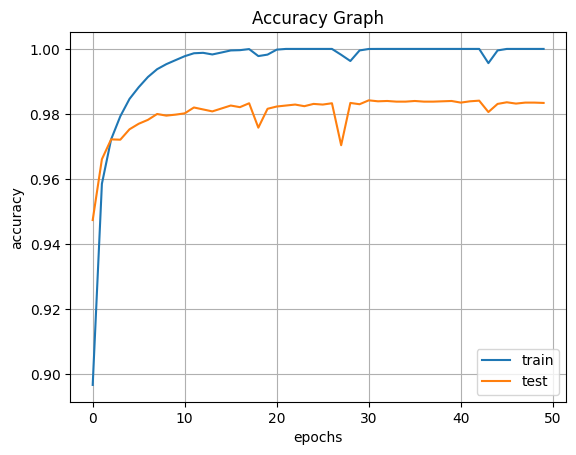

In [6]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

- 손실

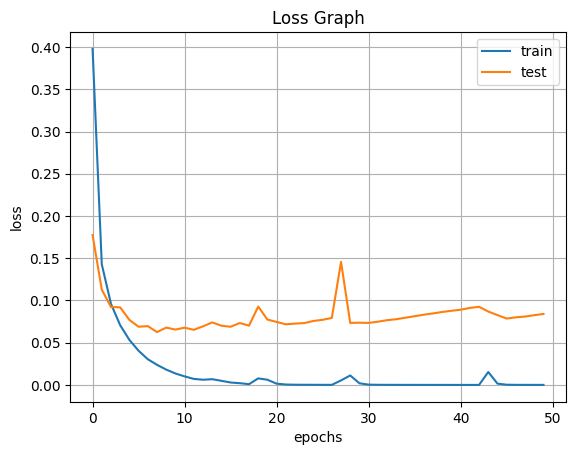

In [7]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show()